In [10]:
import numpy as np
import matplotlib.pyplot as plt


def convection_diffusion(x, t, u, nu, c):
  """Fonction qui résout l'équation de convection-diffusion 1D en utilisant la méthode de collocation de Fourier.
  
  Arguments:
      x (ndarray): grille de points en espace (1D).
      t (float): temps courant.
      u (ndarray): solution courante.
      nu (float): coefficient de diffusion.
      c (float): coefficient de convection.
      
  Renvoie:
      ndarray: solution à t+dt.
  """
  N = len(x)
  dt = t[1] - t[0]  # pas de temps
  U = np.fft.fft(u)  # transformée de Fourier de u
  
  # calcul des coefficients de collocation
  k = 2 * np.pi / (x[-1] - x[0]) * np.arange(N // 2 + 1)
  c1 = -nu * k**2 * dt / 2
  c2 = 1 + c1 - c * k * dt
  
  # résolution de l'équation de convection-diffusion en Fourier
  U = (U - c1)/c2
  
  # transformée de Fourier inverse de la solution
  u_new = np.fft.ifft(U)
  
  return u_new



In [11]:
# exemple d'utilisation de la fonction
x = np.linspace(0, 1, 128)  # grille de points en espace
t = np.linspace(0, 0.1, 10)  # grille de points en temps
u0 = np.sin(2 * np.pi * x)  # condition initiale
nu = 0.1  # coefficient de diffusion
c = 0.5   # coefficient de convection

# résolution de l'équation de convection-diffusion
u = u0
for i in range(1, len(t)):
  u = convection_diffusion(x, t[i-1:i+1], u, nu, c)

# affichage de la solution finale
plt.plot(x, u)
plt.show()


ValueError: operands could not be broadcast together with shapes (128,) (65,) 

c:\Users\lepeu\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


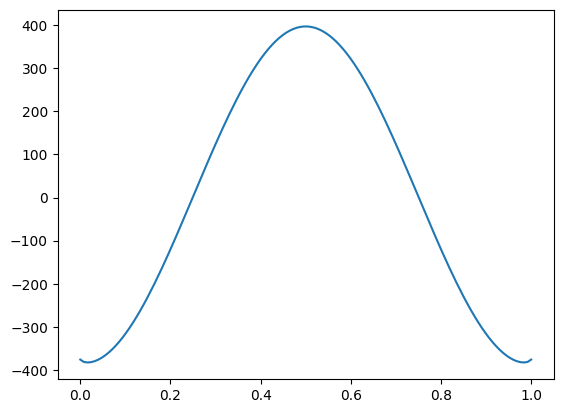

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(x, f):
  """Fonction qui calcule la dérivée de f en utilisant la transformée de Fourier.
  
  Arguments:
      x (ndarray): grille de points en espace (1D).
      f (ndarray): fonction à dériver.
      
  Renvoie:
      ndarray: dérivée de f.
  """
  N = len(x)
  L = x[-1] - x[0]  # longueur de l'intervalle en espace
  k = 2 * np.pi / L * np.arange(N)  # vecteur de fréquences
  
  # matrice de dérivation de Fourier
  D = 1j * k * np.eye(N, dtype=np.complex128)
  
  # transformée de Fourier de f
  F = np.fft.fft(f)
  
  # calcul de la dérivée de f en utilisant la matrice de dérivation de Fourier
  F_deriv = np.dot(D, F)
  
  # transformée de Fourier inverse de la dérivée de f
  f_deriv = np.fft.ifft(F_deriv)
  
  return f_deriv




c:\Users\lepeu\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


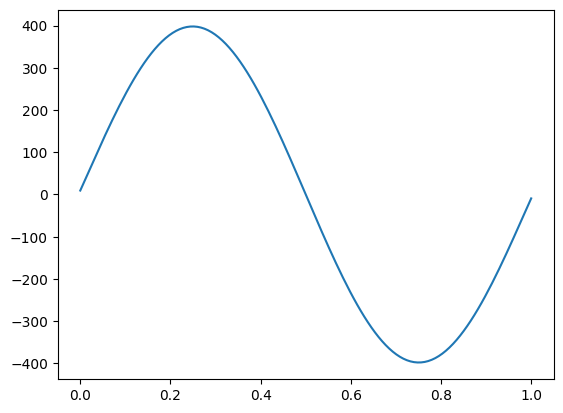

In [8]:
# exemple d'utilisation de la fonction
x = np.linspace(0, 1, 128)  # grille de points en espace
f = np.cos(2 * np.pi * x)  # fonction à dériver

f_deriv = derivative(x, f)  # calcul de la dérivée de f

# affichage de la dérivée de f


# affichage de la dérivée de f
plt.plot(x, f_deriv)
plt.show()

c:\Users\lepeu\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


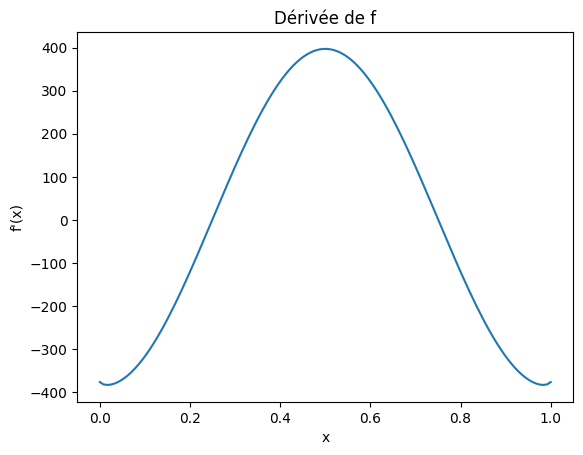

In [7]:
import matplotlib.pyplot as plt

# affichage de la dérivée de f
plt.plot(x, f_deriv)
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Dérivée de f')
plt.show()


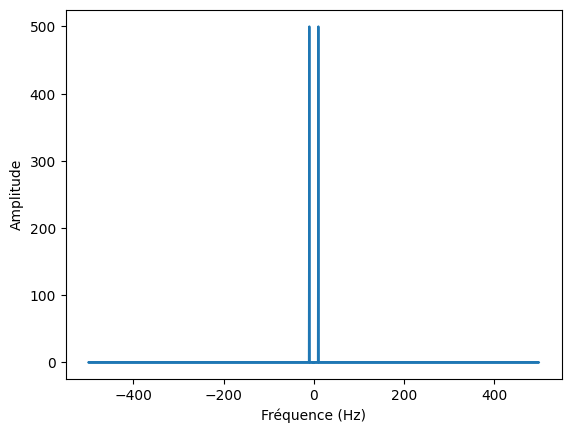

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération du signal sinusoïdal original
sample_rate = 100 # Fréquence d'échantillonnage en Hz
freq = 10 # Fréquence du signal en Hz
num_samples = 1000 # Nombre d'échantillons

# Génération du signal temporel
t = np.linspace(0, 1, num_samples, endpoint=False)
x = np.sin(2 * np.pi * freq * t)

# Calcul de la DFT du signal
X = np.fft.fft(x)

# Fréquences associées aux coefficients
frequencies = np.fft.fftfreq(x.size, t[1]-t[0])

# Affichage des résultats
plt.plot(frequencies, np.abs(X))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [2]:
import numpy as np

# Génération du signal complexe
sample_rate = 100 # Fréquence d'échantillonnage en Hz
freq1 = 10 # Fréquence du premier signal en Hz
freq2 = 20 # Fréquence du second signal en Hz
num_samples = 1000 # Nombre d'échantillons

# Génération du signal temporel
t = np.linspace(0, 1, num_samples, endpoint=False)
x = np.cos(2 * np.pi * freq1 * t) + 1j * np.sin(2 * np.pi * freq2 * t)

# Calcul de la DFT du signal
X = np.fft.fft(x)

# Fréquences associées aux coefficients
frequencies = np.fft.fftfreq(x.size, t[1]-t[0])

print(X)
print(frequencies)


[-4.58833680e-14+1.28853900e-14j -2.26763974e-13+1.50165112e-13j
 -2.85549362e-13-3.89201200e-14j  1.50703572e-13+3.23363474e-14j
 -2.91289211e-13+1.51463626e-13j -4.16735390e-13-2.38179617e-14j
 -5.01820807e-14-2.16362059e-13j -8.96472462e-14-1.02564632e-13j
 -1.51297675e-13-1.14549605e-13j -2.60163626e-13+4.56263131e-14j
  5.00000000e+02-2.88868416e-13j -2.38802779e-13-5.24823935e-14j
 -2.09270492e-13-5.03955238e-13j  3.77323732e-13-4.19378032e-13j
  7.24922325e-14+7.07202261e-14j  1.45050619e-14-8.91124385e-14j
  7.14375293e-15+5.11644194e-14j -1.36437126e-13-2.12240608e-13j
  1.35236643e-13-2.46442374e-13j  1.01481955e-13+5.69744510e-14j
  5.00000000e+02-5.44940731e-13j  2.79982147e-13+4.07651801e-14j
  2.44116940e-14+3.90927037e-14j  8.66487804e-14-3.96817171e-14j
  7.03279619e-14-3.17242632e-14j  1.59567486e-13-6.32103307e-14j
  7.17403814e-14+1.75706630e-13j -4.25216771e-13-1.55206377e-13j
  3.87163362e-13-4.33985334e-13j  2.39301365e-13+2.00925139e-13j
  7.10542736e-14-1.295451

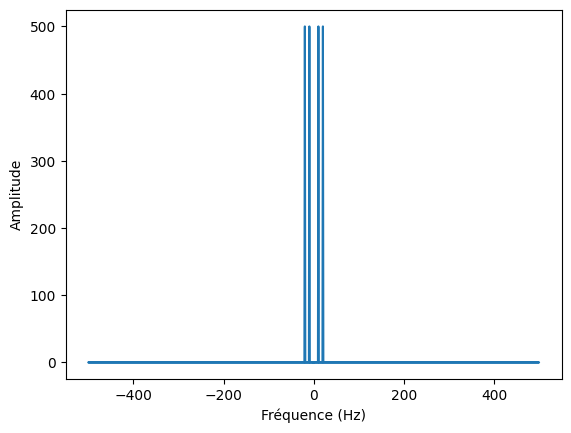

In [3]:
import matplotlib.pyplot as plt

# Affichage des résultats
plt.plot(frequencies, np.abs(X))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.show()


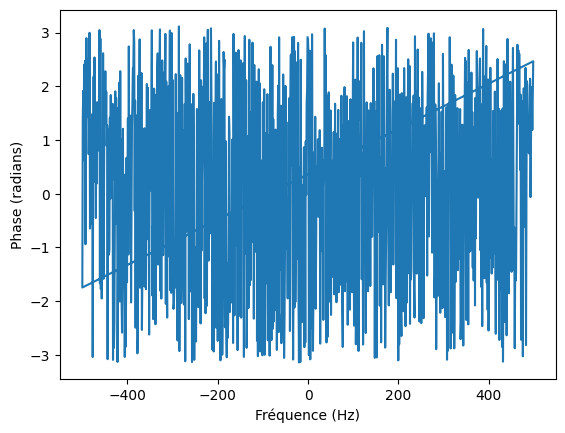

In [4]:
# Affichage de la phase des coefficients
plt.plot(frequencies, np.angle(X))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (radians)')
plt.show()


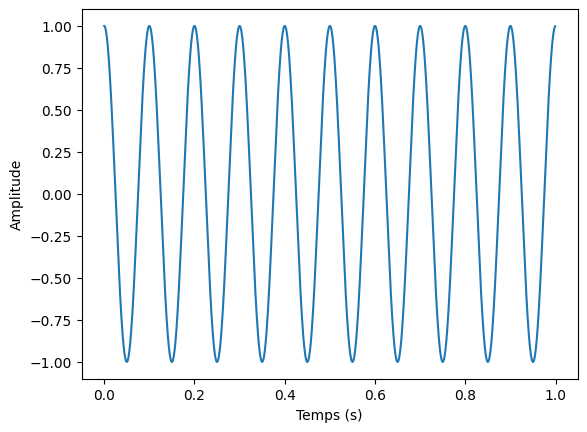

In [5]:
# Affichage du signal
plt.plot(t, np.real(x))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()


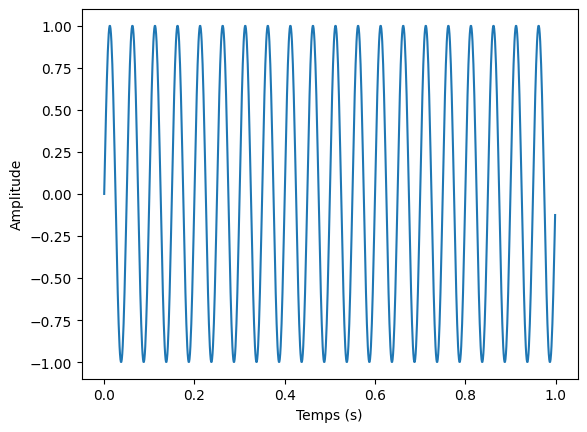

In [6]:
# Affichage de la partie imaginaire du signal
plt.plot(t, np.imag(x))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
import numpy as np
import cv2

# Chargement de l'image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Calcul de la DFT de l'image
dft = np.fft.fft2(image)

# Réduction du nombre de coefficients de la DFT
dft_reduit = np.copy(dft)
dft_reduit[np.abs(dft) < seuil] = 0

# Calcul de la Transformée de Fourier inverse de l'image compressée
image_compressée = np.fft.ifft2(dft_reduit)

# Extraction de la partie réelle de l'image compressée
image_compressée = np.real(image_compressée)

# Enregistrement de l'image compressée
cv2.imwrite('image_compressée.jpg', image_compressée)

import numpy as np
import cv2

def filtre_image(image, type_filtre, seuil):
    # Calcul de la DFT de l'image
    dft = np.fft.fft2(image)

    # Création du masque de filtrage
    if type_filtre == 'passe-haut':
        masque = np.abs(dft) < seuil
    elif type_filtre == 'passe-bas':
        masque = np.abs(dft) > seuil
    else:
        raise ValueError('Type de filtre non reconnu')

    # Application du filtre à l'image
    dft_filtre = np.copy(dft)
    dft_filtre[masque] = 0

    # Calcul de la Transformée de Fourier inverse de l'image filtrée
    image_filtree = np.fft.ifft2(dft_filtre)
